In [20]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

#Formatting describe()
pd.options.display.float_format = '{:,.2f}'.format

In [21]:
# Load cleaned_movies into DataFrame
movies_df = pd.read_csv('movies_final.csv')
#movies_df.head()

In [92]:
# Drop Unnamed column
movies_df = movies_df.loc[:,~movies_df.columns.str.contains('^Unnamed')]
#movies_df.describe()

## Dataframe Adjustments by Column

### Recommended: Column Count Descriptive Stats

In [117]:
###Recommended obtaining column value descriptive stats to determine count parameters
#print(movies_df['column'].value_counts().describe())
#movies_df['column'].value_counts().to_frame().boxplot(vert=False)
def count_cutoff(column, min):
    cutoff_df = movies_df[movies_df[column].map(movies_df[column].value_counts()) \
                    >= movies_df[column].value_counts().quantile(min)][column].value_counts()
    print(cutoff_df)
    print("\nSum")
    print(cutoff_df.sum())
    print(f"\nAll {column} Count Descriptive Stats and Boxplot")
    print(movies_df[column].value_counts().describe())
    movies_df[column].value_counts().to_frame().boxplot(vert=False)
    plt.show()

### Adjust Category Count Range by Quantile

In [6]:
#Categorical variable reduction by value_count.  Uses movies_df dataframe  
#Insert 1. 'column' in quotes 2. minimum movie apperances by quantile (inclusive) 3. maximum movie apperances by quantile (inclusive)
#Returns a dataframe
def reduce_df_count(column, min, max):
    df = movies_df[movies_df[column].map(movies_df[column].value_counts()) >= movies_df['genre'].value_counts().quantile(min)]
    df = df[df[column].map(df[column].value_counts()) <= movies_df['genre'].value_counts().quantile(max)]
    return df

### Adjust Median Category Score Range by Quantile

In [13]:
#Categorical variable reduction by median_rating.  Uses movies_df dataframe  
#Insert 1. 'column' in quotes 2. minimum movie apperances (inclusive) 3. maximum movie apperances (inclusive)
#Returns a dataframe
def reduce_df_median(column, min, max):
    column_medians = movies_df.groupby([column]).median()['score']
    df = movies_df[movies_df[column].map(movies_df.groupby([column]).median()['score']) >= column_medians.quantile(min)]
    df = df[df[column].map(df.groupby([column]).median()['score']) <= column_medians.quantile(max)]
    return df

## Descriptive Statistics Analysis

### Categorical Ordered by Count

In [47]:
#insert dataframe and 'column' in quote
def cat_count(df, column):   
    #Column values and column value counts
    column_counts = df[column].value_counts()
    #Put column counts in a dataframe
    column_counts_df = pd.DataFrame(column_counts).rename(columns={column: "Count"})
    #Put the values in a list
    column_values_list = column_counts.index.to_list()
    
    #Get scores by column value
    value_scores = []
    for value in column_values_list:
        value_df = df.loc[df[column] == value]
        value_score = value_df['score'].to_list()
        value_scores.append(value_score)
    
    #Bargraph of column counts
    length = len(column_values_list)
    width = column_counts_df['Count'].max()
    column_bar = column_counts_df.plot.barh(figsize = (15, length * .5))
    column_bar.set_title(f"Number of Movies by {column}",fontsize=20)
    column_bar.set_xlabel("Count",fontsize=14)
    column_bar.set_ylabel(f"{column}",fontsize=14) 
    column_bar.legend(loc = 'lower right')
    plt.gca().invert_yaxis()

    #Add counts to bar graph
    for i, v in enumerate(column_counts):
        column_bar.text(v , i , str(v),
            color = 'black', fontweight = 'bold')
    
    plt.show()
    
    #Box plot for values and and value scores
    y_labels = column_values_list
    x_values = value_scores
    fig, ax = plt.subplots(figsize=(10, length * .3 ))
    ax.set_title(f'Score by {column}', fontsize=20)
    ax.set_xlabel("Scores", fontsize=14)
    ax.set_ylabel(column, fontsize=14)
    ax.boxplot(x_values, labels=y_labels, vert=False)
    plt.gca().invert_yaxis()
    ax.grid()
    # Save the figure.

    plt.show()

    print(f'All {column} Scores Descriptive Statistics')
    print(movies_df.groupby([column]).mean()['score'].describe())

### Categorical Ordered by Median

In [48]:
#insert dataframe and 'column' in quote
def cat_median(df, column):   
    #Column values and column value counts
    column_counts = df[column].value_counts()
    #Put column counts in a dataframe
    column_counts_df = pd.DataFrame(column_counts).rename(columns={column: "Count"})
    column_counts_df = column_counts_df.reset_index()
    #Get Medians
    median_df = df.groupby([column]).median()[['score']]

    #Merge
    merged_df = column_counts_df.merge(median_df, left_on='index', right_on=f'{column}')
    sorted_df = merged_df.sort_values(by='score')
    final_df = sorted_df.set_index('index')

    #Put the values in a list
    column_values_list = final_df.index.to_list()

    #Get scores by column value
    value_scores = []
    for value in column_values_list:
        value_df = df.loc[df[column] == value]
        value_score = value_df['score'].to_list()
        value_scores.append(value_score)

    #Bargraph of column counts
    length = len(column_values_list)
    column_bar = final_df[['Count']].plot.barh(figsize = (15, length * .5))
    column_bar.set_title(f"Number of Movies by {column}",fontsize=20)
    column_bar.set_xlabel("Count",fontsize=14)
    column_bar.set_ylabel(f"{column}",fontsize=14) 
    column_bar.legend(loc = 'lower right')

    #Add counts to bar graph
    for i, v in enumerate(sorted_df['Count']):
        column_bar.text(v , i , str(v),
            color = 'black', fontweight = 'bold')

    plt.show()

    #Box plot for values and and value scores
    y_labels = column_values_list
    x_values = value_scores
    fig, ax = plt.subplots(figsize=(10, length * .3 ))
    ax.set_title(f'Score by {column}', fontsize=20)
    ax.set_xlabel("Scores", fontsize=14)
    ax.set_ylabel(column, fontsize=14)
    ax.boxplot(x_values, labels=y_labels, vert=False)
    ax.grid()
    # Save the figure.

    plt.show()

    print(f'All {column} Scores Descriptive Statistics')
    print(movies_df.groupby([column]).mean()['score'].describe())

### Numeric Ordered by Median

In [49]:
#insert 1. dataframe 2. 'column' in quotes 3/4. min/max display quantile in decimals (ex: .xx) 
def num_desc(df, column, x_min, x_max):
    
    # Create a box-and-whisker plot for the urban cities ride count.
    fig, ax = plt.subplots()
    ax.boxplot(movies_df[column], labels=[""],vert=False)
    # Add the title, y-axis label and grid.
    ax.set_title(column, fontsize=20)
    ax.set_xlabel('Movie length (min)')
    ax.set_xlim(df[column].quantile(x_min), df[column].quantile(x_max))
    
    ax.grid()
    plt.show()
    
    # Plot actual vs. predicted rating
    fig, ax = plt.subplots(figsize=(10, 13))
    ax.scatter(df[column], df['score'],)
    ax.set_xlim(df[column].quantile(x_min), df[column].quantile(x_max))
    plt.title(f'{column} versus Score',fontsize=20)
    ax.set_xlabel(column, fontsize=14)
    ax.set_ylabel('Scores', fontsize=14)

    ax.grid()
    plt.show()
    
    print(f'All {column} Scores Descriptive Statistics')
    print(df[column].describe())

# Summary of Functions

### DataFrame Adjustments

In [50]:
#count_df = reduce_df_count('column', count_percentile_min, count__percentile_max)
#median_df = reduce_df_median('column', percentile_min, percentile_max)


#NOTE: For count_df, recommended obtaining column value descriptive stats to determine count parameters
#print(movies_df['column'].value_counts().describe())
#movies_df['column'].value_counts().to_frame().boxplot(vert=False)

### Descriptive Stats

In [42]:
#Ordered by 1.Categorical Count 2. Categorical Median 3. Numeric Median
###NOTE: Numeric variables are not naturally binned and so are not described by count
#1. cat_count(df, 'column')
#2. cat_median(df, 'column')
#3. num_desc(df, 'column', percentile_min, percentile_max)

### Variables

In [43]:
##Categorical
# rating
# genre
# year
# director
# writer
# star
# country
# company

##Numeric
# votes
# gross
# runtime

# Analysis

Universal Pictures              376
Warner Bros.                    332
Columbia Pictures               332
Paramount Pictures              319
Twentieth Century Fox           240
                               ... 
Too Askew Prod. Inc.              1
McFarlane Films                   1
Blue Tulip Productions            1
Cinema Line Film Corporation      1
Pryor Entertainment               1
Name: company, Length: 2242, dtype: int64

count   2,242.00
mean        3.31
std        17.10
min         1.00
25%         1.00
50%         1.00
75%         2.00
max       376.00
Name: company, dtype: float64


<AxesSubplot:>

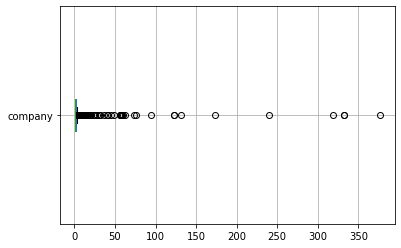

In [64]:
print(movies_df['company'].value_counts())
print()
print(movies_df['company'].value_counts().describe())
movies_df['company'].value_counts().to_frame().boxplot(vert=False)

In [100]:
test_df = movies_df[movies_df['company'].map(movies_df['company'].value_counts()) >= movies_df['company'].value_counts().quantile(.95)]['company'].value_counts()
test_df

Universal Pictures                 376
Warner Bros.                       332
Columbia Pictures                  332
Paramount Pictures                 319
Twentieth Century Fox              240
                                  ... 
Pathé Pictures International         7
Bandai Visual Company                7
Phoenix Pictures                     7
The Geffen Company                   7
Twentieth Century Fox Animation      7
Name: company, Length: 128, dtype: int64

In [101]:
test_df.sum()

4289

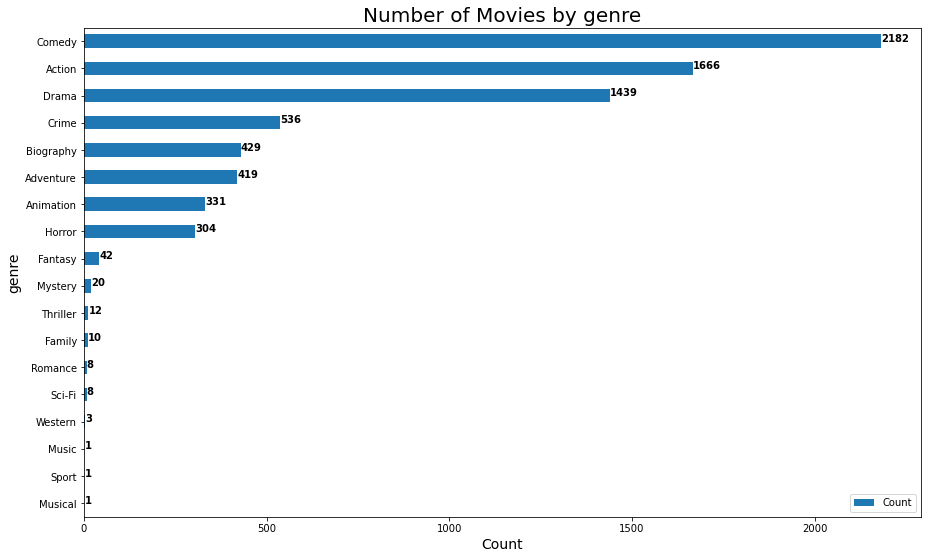

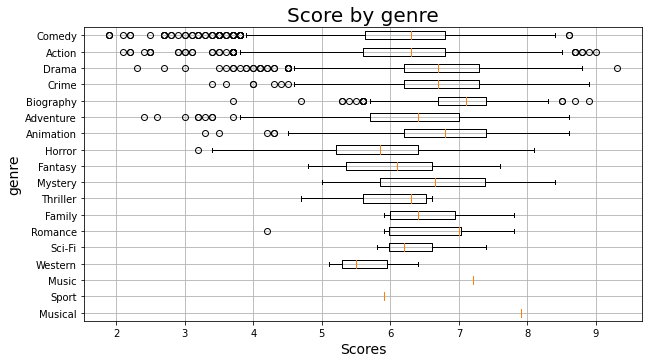

All genre Scores Descriptive Statistics
count   18.00
mean     6.47
std      0.55
min      5.67
25%      6.09
50%      6.44
75%      6.69
max      7.90
Name: score, dtype: float64


In [51]:
cat_count(small_df, 'genre')